In [23]:
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib inline
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

import keras
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, ZeroPadding2D
from keras.layers import MaxPooling2D, UpSampling2D, Input, Dropout
from keras.models import Sequential, Model
from keras.utils import np_utils

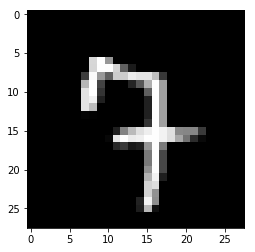

In [2]:
ds = pd.read_csv('train.csv')
mnist = ds.values[:10000]
img = mnist[254,1:].reshape((28,28))
plt.imshow(img, cmap='gray')

In [3]:
xt = mnist[:,1:]/255.0
yt = mnist[:,0]

xt = xt.reshape((xt.shape[0],28,28,1))
yt = np_utils.to_categorical(yt)

split = int(0.45*xt.shape[0])
xval = xt[split:]
yval = yt[split:]

xt = xt[:split]
yt = yt[:split]

In [4]:
inp = Input(shape=(28,28,1))
embedding_shape = 10

#-------------- Encoder ------------------#
cnv1 = Convolution2D(16,5,5, activation='relu')(inp)
mxp1 = MaxPooling2D((2,2))(cnv1)
cnv2 = Convolution2D(8,3,3, activation='relu')(mxp1)
mxp2 = MaxPooling2D((2,2))(cnv2)

#-------------- Embedder ------------------#
flt1 = Flatten()(mxp2)
den1 = Dense(3, activation='softmax')(flt1)
den2 = Dense(200, activation='relu')(den1)
res1 = Reshape((5,5,8))(den2)

#-------------- Decoder ------------------#
ups1 = UpSampling2D((2,2))(res1)

dcn1 = ZeroPadding2D((1,1))(ups1)
dcn1 = Convolution2D(16,3,3, activation='relu', border_mode='same')(dcn1)

ups2 = UpSampling2D((2,2))(dcn1)

dcn2 = ZeroPadding2D((2,2))(ups2)
dcn2 = Convolution2D(1,5,5, border_mode='same', activation = 'relu')(dcn2)

#-------------- Model ------------------#
model = Model(input=inp, output=dcn2)
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 24, 24, 16)    416         input_1[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 12, 12, 16)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 10, 10, 8)     1160        maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [5]:
hist = model.fit(xt, xt,
                nb_epoch=3,
                shuffle=True,
                batch_size=50,
                validation_data = (xval,xval))

Train on 4500 samples, validate on 5500 samples
Epoch 1/3
4500/4500 [==============================] - 11s - loss: 0.0721 - acc: 0.8023 - val_loss: 0.0639 - val_acc: 0.7990

In [13]:
encoder = Model(input=inp, output=den1)
out = encoder.predict(xval[:200])

<IPython.core.display.Javascript object>


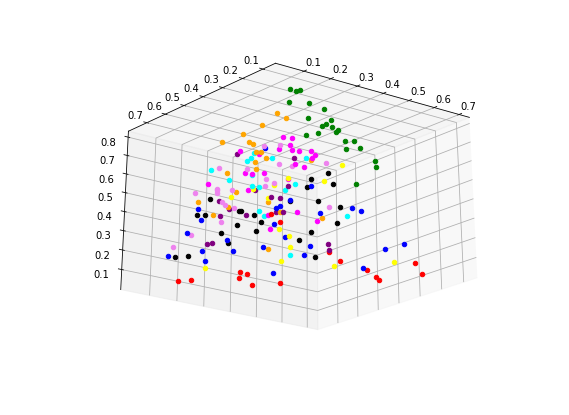

In [24]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color = ['red', 'green', 'blue', 'purple', 'cyan', 'black', 'yellow', 'magenta', 'violet', 'orange']

for i in range(out.shape[0]):
    ax.scatter(out[i,0], out[i,1], out[i,2], color = color[yval[i].argmax()])

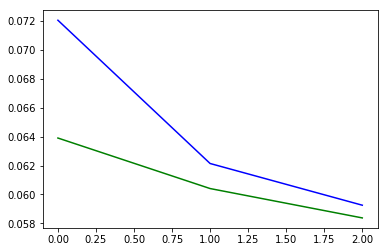

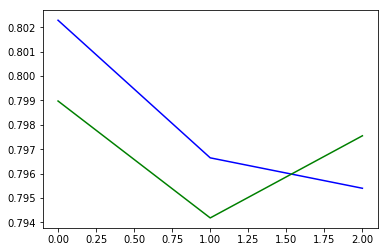

In [7]:
th = hist.history

plt.figure(0)
plt.plot(th['loss'], 'b')
plt.plot(th['val_loss'], 'g')

plt.figure(1)
plt.plot(th['acc'], 'b')
plt.plot(th['val_acc'], 'g')

In [8]:
out = model.predict(xval[:10])

In [9]:
print xval.shape

(5500, 28, 28, 1)


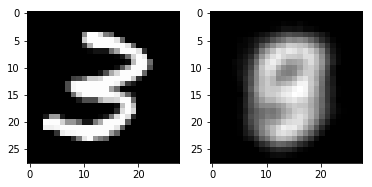

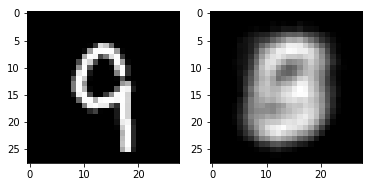

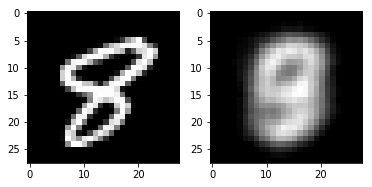

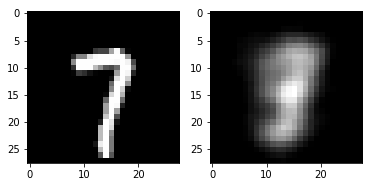

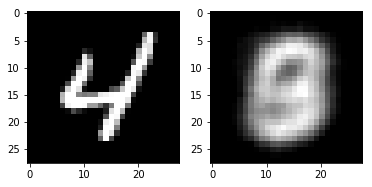

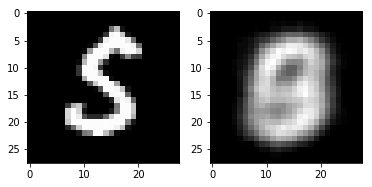

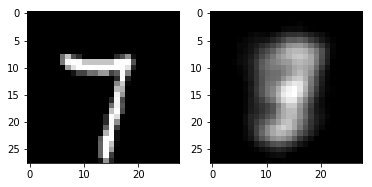

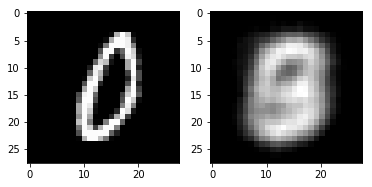

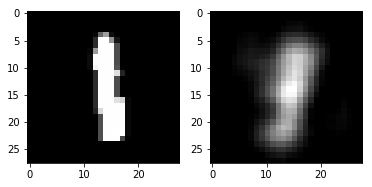

In [10]:
for i in range(1,10):
    plt.figure(i)
    plt.subplot(1,2,1)
    plt.imshow(xval[i].reshape((28,28)), cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(out[i].reshape((28,28)), cmap='gray')
plt.show()